In [15]:
import pandas as pd
import numpy as np

DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [192]:
# import like this
items_path = "items.csv"
q1_path = "quarter-1.csv"
q2_path = "quarter-2.csv"
q3_path = "quarter-3.csv"


q1= pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)

items = pd.read_csv(items_path)
items.head()

,item_id,item_name
0,0,Chips and Fresh Tomato Salsa
1,1,Izze
2,2,Nantucket Nectar
3,3,Chips and Tomatillo-Green Chili Salsa
4,4,Chicken Bowl


###`Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [195]:
# code here

#1
quarter_df = pd.concat([q1,q2,q3],keys=['Q1','Q2','Q3'])
quarter_df.reset_index(inplace=True)
quarter_df.rename(columns={'level_0':'quarter'},inplace=True)
quarter_df.head()

,quarter,level_1,order_id,quantity,item_id,choice_description_id,item_price
0,Q1,0,1,1,1,1,$3.39
1,Q1,1,1,1,2,2,$3.39
2,Q1,2,2,2,4,3,$16.98
3,Q1,3,4,1,7,6,$9.25
4,Q1,4,6,1,9,8,$8.75


In [209]:
# 2
temp_df = quarter_df.merge(items,on='item_id')
temp_df['item_price'] = temp_df['item_price'].apply(lambda x:x.replace('$','')).astype(float)

# 3
temp_df.groupby(['quarter','item_name'])['quantity'].sum().sort_values(ascending=False).reset_index().drop_duplicates('quarter',keep='first')

,quarter,item_name,quantity
0,Q2,Chicken Bowl,394
1,Q1,Chicken Bowl,367


In [241]:
temp_df['total_price'] = temp_df['item_price'] * temp_df['quantity']

In [245]:
# 4
temp_df.groupby(['quarter','item_name'],as_index=False)['total_price'].sum().sort_values(by='total_price',ascending=False).drop_duplicates('quarter')

,quarter,item_name,total_price
65,Q2,Chicken Bowl,4192.25
17,Q1,Chicken Bowl,3852.38


In [251]:
# 5
temp_df.groupby(['quarter','order_id'],as_index=False)['total_price'].sum().groupby('quarter',as_index=False)['total_price'].mean()

,quarter,total_price
0,Q1,13.809488
1,Q2,13.279828


###`Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no. of wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [30]:
# code here
balls = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
balls.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals


In [143]:
matches = pd.read_csv('IPL_Matches_2008_2022.csv')
matches.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [275]:
season_df = balls.merge(matches[['ID','Season']],on='ID')
season_df['IsBowelerWicket'] = season_df.kind.apply(lambda x : 1 if x in ["caught", 'caught and bowled', 'bowled', 'stumped','lbw', 'hit wicket'] else 0)
season_df['BowlerRun'] = season_df.extra_type.apply(lambda x : 0 if x in ['legbyes','byes'] else 1) * season_df['total_run']
season_df['IsLegalBall'] = season_df.extra_type.apply(lambda x: 0 if x in ['wides','noballs'] else 1)
pcapdf = season_df.groupby(['Season','bowler'],as_index=False)[['IsBowelerWicket','BowlerRun','IsLegalBall']].sum()
pcapdf['Economy'] = (pcapdf['BowlerRun'] / pcapdf['IsLegalBall'])  * 6
pcapdf.sort_values(['IsBowelerWicket','Economy'],ascending=[False,True]).drop_duplicates('Season').sort_values('Season')

,Season,bowler,IsBowelerWicket,BowlerRun,IsLegalBall,Economy
84,2007/08,Sohail Tanvir,22,266,247,6.461538
174,2009,RP Singh,23,417,358,6.988827
284,2009/10,PP Ojha,21,429,353,7.291785
447,2011,SL Malinga,28,375,378,5.952381
537,2012,M Morkel,25,453,378,7.190476
629,2013,DJ Bravo,32,497,375,7.952000
779,2014,MM Sharma,23,452,323,8.396285
847,2015,DJ Bravo,26,426,314,8.140127
938,2016,B Kumar,23,490,396,7.424242
1048,2017,B Kumar,26,369,314,7.050955


###`Q-7:` Best bowler in death overs.
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [284]:
# code here
death_overs = season_df[season_df.overs >= 15]
pcapdf = death_overs.groupby('bowler',as_index=False)[['IsBowelerWicket','BowlerRun','IsLegalBall']].sum()
pcapdf['Economy'] = (pcapdf['BowlerRun'] / pcapdf['IsLegalBall'])  * 6
pcapdf.sort_values(['IsBowelerWicket','Economy'],ascending=[False,True]).head()

,bowler,IsBowelerWicket,BowlerRun,IsLegalBall,Economy
91,DJ Bravo,115,2161,1385,9.361733
331,SL Malinga,108,1464,1117,7.863921
53,B Kumar,90,1752,1173,8.961637
148,JJ Bumrah,80,1614,1146,8.450262
339,SP Narine,67,1164,949,7.359326


###`Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [297]:
batterdf = season_df.copy()
batterdf['IsBatsmanBall'] = batterdf.extra_type.apply(lambda x: 1 if x!= 'wides' else 0)

def batsman_record(batsman):
    bdf = batterdf[batterdf.batter == batsman].copy()
    bdf['IsBatsmanOut'] = bdf.batter == bdf.player_out
    df = bdf.groupby(['Season','ID'],as_index=False)[['batsman_run','IsBatsmanBall','IsBatsmanOut']].sum()
    innings = df.groupby('Season').ID.count()
    df = df.groupby('Season').agg({
        'batsman_run' :['sum','max'],
        'IsBatsmanBall' : ['sum'],
        'IsBatsmanOut' :'sum'

    })
    df['innings'] = innings
    df['TotalRuns'] = df[('batsman_run','sum')]
    df['Avg'] = df['TotalRuns'] / df[('IsBatsmanOut','sum')]
    df['HighestScore'] = df[('batsman_run','max')]
    df['StrikeRate'] = df['TotalRuns'] / df[('IsBatsmanBall','sum')] * 100
    return df.drop(columns=['batsman_run','IsBatsmanBall','IsBatsmanOut'])

batsman_record('MS Dhoni')

,innings,TotalRuns,Avg,HighestScore,StrikeRate
,,,,,
Season,,,,,
2007/08,14,414,41.400000,65,133.548387
2009,13,332,41.500000,58,127.203065
2009/10,11,287,31.888889,66,136.666667
2011,13,392,43.555556,70,158.704453
2012,17,358,32.545455,51,128.776978
2013,16,461,46.100000,67,162.897527
2014,15,371,74.200000,57,148.400000
2015,17,372,31.000000,53,121.967213


###`Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan

```


In [319]:
# code here
df = balls.merge(matches[["ID", "Player_of_Match"]], on="ID")
batterdf = df[df.batter == df.Player_of_Match].copy()
batterdf["IsBatsmanBall"] = batterdf["extra_type"].apply(lambda x: 1 if x != "wides" else 0)
batter = batterdf.groupby(["ID", "batter"], as_index=False)[["batsman_run", "IsBatsmanBall"]].sum()
batter["BattingFigure"] = batter[["batsman_run", "IsBatsmanBall"]].apply(lambda x: '/'.join(map(str, x.values)), axis = 1)
batter.rename(columns = {"batter": "PlayerOfMatch"}, inplace = True)
batter.head()

,ID,PlayerOfMatch,batsman_run,IsBatsmanBall,BattingFigure
0,335982,BB McCullum,158,73,158/73
1,335983,MEK Hussey,116,54,116/54
2,335985,MV Boucher,39,19,39/19
3,335986,DJ Hussey,38,43,38/43
4,335987,SR Watson,76,49,76/49


In [320]:
bowlerdf = df[df.bowler == df.Player_of_Match].copy()
bowlerdf["IsBowlerWicket"] = bowlerdf["kind"].apply(lambda x: 1 if x in ["caught", 'caught and bowled', 'bowled', 'stumped','lbw', 'hit wicket'] else 0)
bowlerdf["BowlerRun"] = bowlerdf.extra_type.apply(lambda x: 0 if x in ["legbyes", "byes"] else 1) * bowlerdf["total_run"]
bowler = bowlerdf.groupby(["ID", "bowler"], as_index=False)[["IsBowlerWicket", "BowlerRun"]].sum()
bowler["BowlingFigure"] = bowler[["IsBowlerWicket", "BowlerRun"]].apply(lambda x: '/'.join(map(str, x.values)), axis = 1)
bowler.rename(columns = {"bowler": "PlayerOfMatch"}, inplace = True)
bowler.head()

,ID,PlayerOfMatch,IsBowlerWicket,BowlerRun,BowlingFigure
0,335984,MF Maharoof,2,11,2/11
1,335986,DJ Hussey,1,35,1/35
2,335987,SR Watson,0,39,0/39
3,335990,YK Pathan,2,20,2/20
4,335992,SR Watson,2,20,2/20


In [322]:
batter.merge(bowler, on=["ID", "PlayerOfMatch"], how = "outer").drop(columns = ["batsman_run", "IsBatsmanBall", "IsBowlerWicket", "BowlerRun"]).head()

,ID,PlayerOfMatch,BattingFigure,BowlingFigure
0,335982,BB McCullum,158/73,NaN
1,335983,MEK Hussey,116/54,NaN
2,335985,MV Boucher,39/19,NaN
3,335986,DJ Hussey,38/43,1/35
4,335987,SR Watson,76/49,0/39


## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [323]:
import pandas as pd
sepal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")
petal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")
versicolor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")
setosa = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")

### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

<AxesSubplot:xlabel='Species'>

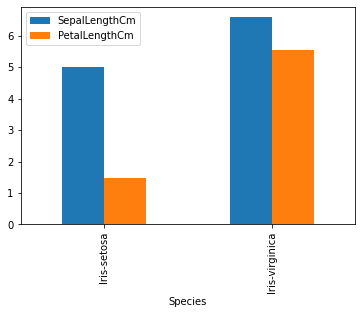

In [337]:
# code here
virginica
setosa
temp_df = pd.concat([setosa,virginica]).merge(sepal_all,on='Id').merge(petal_all,on='Id')
temp_df.groupby('Species')[['SepalLengthCm','PetalLengthCm']].mean().plot(kind='bar')

<AxesSubplot:xlabel='kind'>

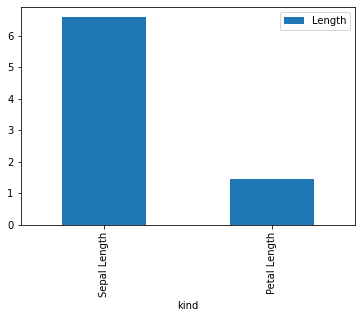

In [338]:
sepal = pd.merge(virginica, sepal_all, on="Id")["SepalLengthCm"].mean()
petal = pd.merge(setosa, petal_all, on="Id")["PetalLengthCm"].mean()
pd.DataFrame({"kind": ["Sepal Length", "Petal Length"], "Length": [sepal, petal]}).plot(x="kind", kind = "bar")

### `Q-10:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle.

In [325]:
# code here
temp_df = pd.concat([virginica,versicolor,setosa]).merge(sepal_all,on='Id').merge(petal_all,on='Id')
temp_df = temp_df.sample(temp_df.shape[0],random_state=1)[['Id','Species','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
temp_df

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,115,Iris-virginica,5.8,2.8,5.1,2.4
98,99,Iris-versicolor,5.1,2.5,3.0,1.1
75,76,Iris-versicolor,6.6,3.0,4.4,1.4
16,117,Iris-virginica,6.5,3.0,5.5,1.8
131,32,Iris-setosa,5.4,3.4,1.5,0.4
...,...,...,...,...,...,...
133,34,Iris-setosa,5.5,4.2,1.4,0.2
137,38,Iris-setosa,4.9,3.1,1.5,0.1
72,73,Iris-versicolor,6.3,2.5,4.9,1.5
140,41,Iris-setosa,5.0,3.5,1.3,0.3


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [329]:
# code here
species_group = temp_df.groupby('Species')

for group in list(species_group.groups.keys()):
    maximum = species_group.get_group(group)['SepalWidthCm'].max()
    minimum = species_group.get_group(group)['SepalWidthCm'].min()    
    print(f"Minimum Sepal width of {group.split('-')[1].capitalize()} is ", minimum )
    print(f"Maximum Sepal width of {group.split('-')[1].capitalize()} is ", maximum)
    print('*'*50)

Minimum Sepal width of Setosa is  2.3
Maximum Sepal width of Setosa is  4.4
**************************************************
Minimum Sepal width of Versicolor is  2.0
Maximum Sepal width of Versicolor is  3.4
**************************************************
Minimum Sepal width of Virginica is  2.2
Maximum Sepal width of Virginica is  3.8
**************************************************
